<a href="https://colab.research.google.com/github/Viktory4121/MME/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

In [1]:
data <- read.csv("energy_efficiency_data.csv", sep = ",")
#data <- na.omit(data)
head(data)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [2]:
summary(data)

 Relative_Compactness  Surface_Area     Wall_Area       Roof_Area    
 Min.   :0.6200       Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825       1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500       Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642       Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300       3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800       Max.   :808.5   Max.   :416.5   Max.   :220.5  
 Overall_Height  Orientation    Glazing_Area    Glazing_Area_Distribution
 Min.   :3.50   Min.   :2.00   Min.   :0.0000   Min.   :0.000            
 1st Qu.:3.50   1st Qu.:2.75   1st Qu.:0.1000   1st Qu.:1.750            
 Median :5.25   Median :3.50   Median :0.2500   Median :3.000            
 Mean   :5.25   Mean   :3.50   Mean   :0.2344   Mean   :2.812            
 3rd Qu.:7.00   3rd Qu.:4.25   3rd Qu.:0.4000   3rd Qu.:4.000            
 Max.   :7.00   Max.   :5.00   Max.   :0.4000   Max.   :5.000     

In [3]:
#data_111 <- read.csv(file = file.choose(), header = TRUE, sep = ",")

#2

In [4]:
#деление на тестовую и обучающую выборку
index <- sample(1:nrow(data), nrow(data) * 0.8) 
test <- data[-c(index), ]
train <- data[index, ]

#3

In [5]:
#где выходом является у1 = sum(по всем столбцам, кроме Cooling_Load)
#lm_y1 <- lm(formula = Heating_Load ~ Relative_Compactness + Surface_Area 
            #+ Wall_Area + Roof_Area + Overall_Height + Orientation + Glazing_Area + Glazing_Area_Distribution, data = train)
lm_y1 <- lm(formula = Heating_Load ~.-Cooling_Load, data = train)
summary(lm_y1)


Call:
lm(formula = Heating_Load ~ . - Cooling_Load, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8707 -1.3841  0.0222  1.3170  7.8034 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                82.946669  21.723294   3.818 0.000148 ***
Relative_Compactness      -62.055222  11.743932  -5.284 1.77e-07 ***
Surface_Area               -0.087944   0.019520  -4.505 7.95e-06 ***
Wall_Area                   0.064266   0.007603   8.453  < 2e-16 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              3.935343   0.384050  10.247  < 2e-16 ***
Orientation                -0.072155   0.108018  -0.668 0.504393    
Glazing_Area               19.240984   0.923467  20.836  < 2e-16 ***
Glazing_Area_Distribution   0.161811   0.078782   2.054 0.040412 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 

In [6]:
glm_y1 <- glm(Heating_Load ~.-Cooling_Load, data = train)
summary(glm_y1)


Call:
glm(formula = Heating_Load ~ . - Cooling_Load, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.8707  -1.3841   0.0222   1.3170   7.8034  

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                82.946669  21.723294   3.818 0.000148 ***
Relative_Compactness      -62.055222  11.743932  -5.284 1.77e-07 ***
Surface_Area               -0.087944   0.019520  -4.505 7.95e-06 ***
Wall_Area                   0.064266   0.007603   8.453  < 2e-16 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              3.935343   0.384050  10.247  < 2e-16 ***
Orientation                -0.072155   0.108018  -0.668 0.504393    
Glazing_Area               19.240984   0.923467  20.836  < 2e-16 ***
Glazing_Area_Distribution   0.161811   0.078782   2.054 0.040412 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dis

In [40]:
func_nlm <- function(a, b){
  a[1]*b[1]+a[2]*b[2]+a[3]*b[3]+a[4]*b[4]+a[5]*b[5]+a[6]*b[6]+a[7]*b[7]+a[8]*b[8]
}
fun1 <- function(a){
  sum((func_nlm(a, train[, 1:8]) - (train$Heating_Load))^2)
}

nlm_y1 <- nlm(fun1, p = c(0,0,0,0,0,0,0,0))$estimate
summary(nlm_y1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-17.879  -2.550   2.611   3.297  12.295  19.958 

hidden: 3    thresh: 0.01    rep: 1/1    steps: 
     81
	error: 168484.38853
	time: 0.04 secs



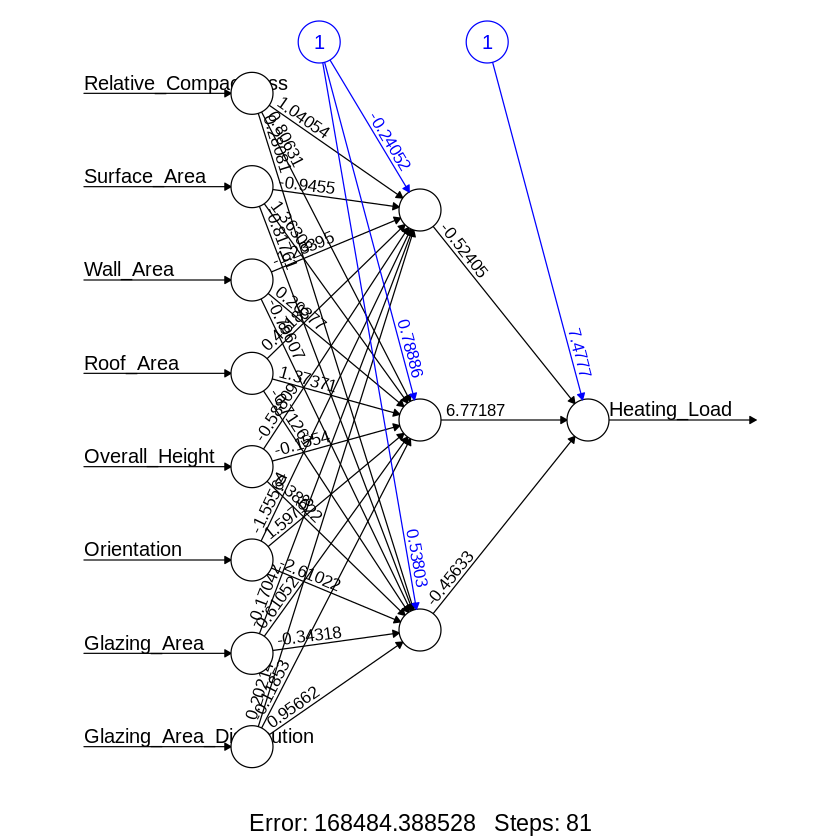

In [8]:
#install.packages("neuralnet")
library(neuralnet)

neuralnet_y1 <- neuralnet(Heating_Load ~.-Cooling_Load, data = train, hidden = 3, linear.output = FALSE, lifesign = "full", stepmax = 1000000000)
plot(neuralnet_y1, rep = 1)

#-------------------------------------------------------------------------------------------------------------------------

In [9]:
#где выходом является у2 = sum(по всем столбцам, кроме Heating_Load)
lm_y2 <- lm(formula = Cooling_Load ~.-Heating_Load, data = train)
summary(lm_y2)


Call:
lm(formula = Cooling_Load ~ . - Heating_Load, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7770 -1.6575 -0.2866  1.3782 11.3520 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                96.639672  23.864147   4.050 5.80e-05 ***
Relative_Compactness      -69.508284  12.901308  -5.388 1.02e-07 ***
Surface_Area               -0.088441   0.021443  -4.124 4.24e-05 ***
Wall_Area                   0.047031   0.008352   5.631 2.75e-08 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              4.158419   0.421899   9.856  < 2e-16 ***
Orientation                 0.094017   0.118664   0.792    0.428    
Glazing_Area               13.922205   1.014475  13.724  < 2e-16 ***
Glazing_Area_Distribution   0.017898   0.086546   0.207    0.836    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 

In [10]:
glm_y2 <- glm(Cooling_Load ~.-Heating_Load, data = train)
summary(glm_y2)


Call:
glm(formula = Cooling_Load ~ . - Heating_Load, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.7770  -1.6575  -0.2866   1.3782  11.3520  

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                96.639672  23.864147   4.050 5.80e-05 ***
Relative_Compactness      -69.508284  12.901308  -5.388 1.02e-07 ***
Surface_Area               -0.088441   0.021443  -4.124 4.24e-05 ***
Wall_Area                   0.047031   0.008352   5.631 2.75e-08 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              4.158419   0.421899   9.856  < 2e-16 ***
Orientation                 0.094017   0.118664   0.792    0.428    
Glazing_Area               13.922205   1.014475  13.724  < 2e-16 ***
Glazing_Area_Distribution   0.017898   0.086546   0.207    0.836    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dis

In [41]:
fun2 <- function(a){
  sum((func_nlm(a, train[, 1:8]) - (train$Cooling_Load))^2)
}
nlm_y2 <- nlm(fun2, p = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))$estimate
summary(nlm_y2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-18.039  -2.581   2.779   2.768  11.263  20.804 

hidden: 3    thresh: 0.01    rep: 1/1    steps: 
     37
	error: 196920.66991
	time: 0.02 secs



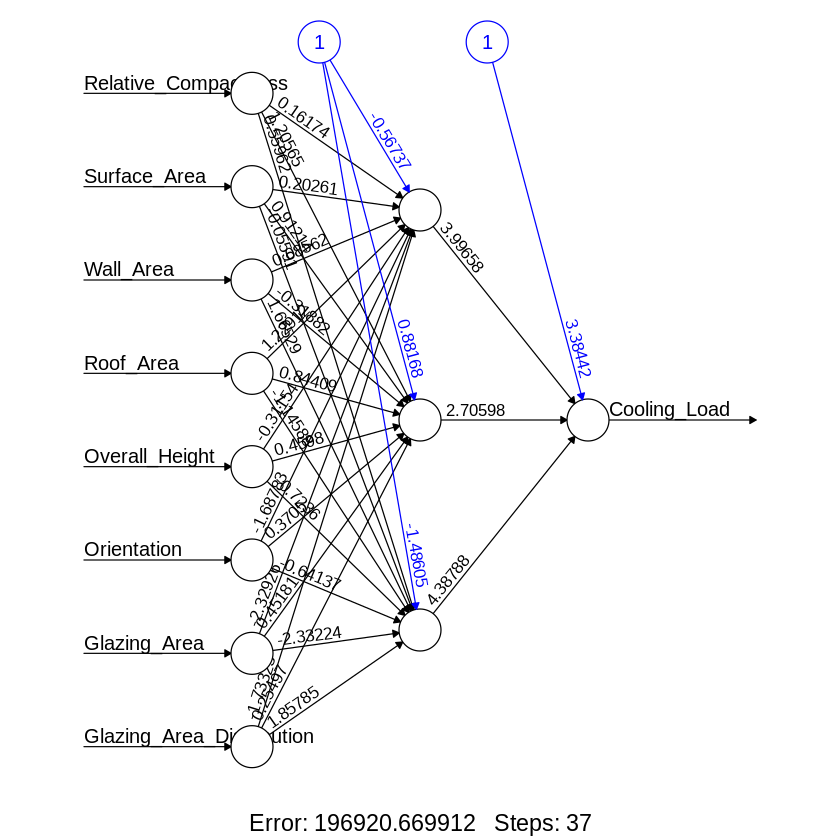

In [11]:
neuralnet_y2 <- neuralnet(Cooling_Load ~.-Heating_Load, data = train, hidden = 3, linear.output = FALSE, lifesign = "full", stepmax = 1000000000)
plot(neuralnet_y2, rep = 1)

#4

In [42]:
#линейная
pred_lm_y1 <- predict(lm_y1, test)
pred_lm_y2 <- predict(lm_y2, test)
#логистическая
pred_glm_y1 <- predict(glm_y1, test)
pred_glm_y2 <- predict(glm_y2, test)
#полиномиальная
pred_nlm_y1 <- func_nlm(nlm_y1, test[, 1:8])
pred_nlm_y2 <- func_nlm(nlm_y2, test[, 1:8])
#нейросеть
pred_nn_y1 <- compute(neuralnet_y1, test[, 1:8])
pred_nn_y2 <- compute(neuralnet_y2, test[, 1:8])

Warning message in predict.lm(lm_y1, test):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(lm_y2, test):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [43]:
accuracy <- function(pred, y){
  return (1 - norm(as.matrix(pred)-as.matrix(y)) / norm(as.matrix(y)))
}
acc_lm_y1 <- accuracy(pred_lm_y1, test$Heating_Load)
acc_glm_y1 <- accuracy(pred_glm_y1, test$Heating_Load)
acc_nn_y1 <- pred_nn_y1$net.result
acc_nlm_y1 <- accuracy(pred_nlm_y1, test$Heating_Load)

acc_lm_y2 <- accuracy(pred_lm_y2, test$Cooling_Load)
acc_glm_y2 <- accuracy(pred_glm_y2, test$Cooling_Load)
acc_nn_y2 <- pred_nn_y1$net.result
acc_nlm_y2 <- accuracy(pred_nlm_y2, test$Cooling_Load)

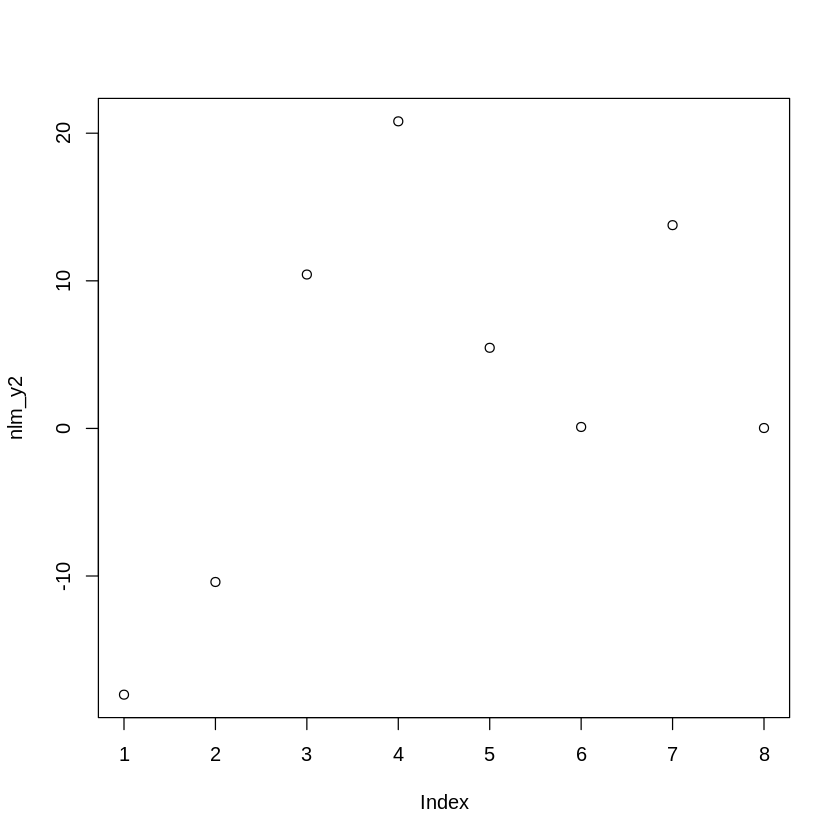

In [46]:
plot(nlm_y2)

#5

In [45]:
r1 = c(acc_lm_y1, acc_glm_y1, acc_nlm_y1, acc_nn_y1[1])
r2 = c(acc_lm_y2, acc_glm_y2, acc_nlm_y2, acc_nn_y2[1])

table_0 <- matrix(c(r1,r2), ncol=4, byrow=TRUE)
colnames(table_0) <- c('lm', 'glm', 'nlm', 'nn')
rownames(table_0) <- c('y1', 'y2')
rezult <- as.table(table_0)
print(rezult)

          lm       glm       nlm        nn
y1 0.9152873 0.9152873 0.9106452 0.9999994
y2 0.9172105 0.9172105 0.9142548 0.9999994


#6

In [63]:
variable_nn <- function(a, b, c){
  w <- c - as.matrix(test[, 1:8]) %*% a[2:9] - a[1]
  return (norm(w, b))
}
nlm(variable_nn, 1:9, b = '1', c = test$Heating_Load)

$minimum
[1] 286.6773

$estimate
[1]  94.630638228 -71.023945137  -1.661766314   1.624350815   3.129423273
[6]   4.306961648  -0.009915217  21.031787428   0.136644400

$gradient
[1]   -1.16434237   -0.52330904 -161.64490860  673.89616112  -25.85866147
[6]    0.09688843    2.51423125    0.11899467    2.51423125

$code
[1] 3

$iterations
[1] 59

In [64]:
nlm(variable_nn, 1:9, b = '1', c = test$Cooling_Load)

$minimum
[1] 1829.587

$estimate
[1] -326.6068428  100.0408441 -182.5670256  182.8757889  365.7274500
[6]   11.9879357   -0.5776576   48.1630948   -3.8727389

$gradient
[1]   -103.835    -82.770 -55773.529 -29234.814 -16610.302   -556.500   -381.000
[8]    -24.100   -366.000

$code
[1] 3

$iterations
[1] 12

In [66]:
nlm(variable_nn, 1:9, b = 'I', c = test$Heating_Load)

$minimum
[1] 32.33697

$estimate
[1]  525.894635 -160.008808   -5.536774    5.434813    9.614061  -18.801166
[7]   -4.734906   17.956949    3.856084

$gradient
[1]   -1.0000   -0.6400 -637.2752 -343.0000 -147.1585   -3.5000   -5.0000
[8]   -0.1000   -1.0000

$code
[1] 2

$iterations
[1] 22

In [67]:
nlm(variable_nn, 1:9, b = 'I', c = test$Cooling_Load)

$minimum
[1] 79.97889

$estimate
[1]  14.0124660 -13.6245337   2.7178064  -2.8984145  -5.5283374   6.8703635
[7]  -0.9587764   6.0374048  -0.8133469

$gradient
[1]   -1.00   -0.64 -784.00 -343.00 -220.50   -3.50   -4.00   -0.40   -4.00

$code
[1] 2

$iterations
[1] 22

In [85]:
#install.packages("quantreg")
library(quantreg)
#mape_nn_y1 <- rq(formula = Heating_Load ~.-Cooling_Load, data = test, tau = 0.2)

mape_nn_y1 <- rq.fit.lasso(y = train[, 9], x = train[, 1:8], tau = 0.2)
pred_mape_nn_y1 <- predict(mape_nn_y1, test)
result_mape_nn_y1 <- 1.0 / length(test$Heating_Load)*sum(abs((test$Heating_Load - pred_mape_nn_y1) / (test$Heating_Load)))

#mape_nn_y2 <- rq(formula = Cooling_Load ~.- Heating_Load, data = test, tau = 0.2)
#pred_mape_nn_y2 <- predict(mape_nn_y2, test)
#result_mape_nn_y2 <- 1.0 / length(test$Cooling_Load)*sum(abs((test$Cooling_Load - pred_mape_nn_y2) / (test$Cooling_Load)))

ERROR: ignored